## Lynch-Oster plague model

#### Import packages

In [87]:
!pip install pymc
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
from pymc.Matplot import plot
import scipy.stats

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support


#### Import observed data

In [88]:
barcelona_1490 = np.array([1,0,1,1,0,1,5,3,1,0,1,1,2,3,5,0,6,3,6,3,8,1,5,2,1,1,2,2,2,5,7,12,4,3,5,3,8,5,8,8,6,12,11,22,15,14,24,14,15,20,20,13,11,25,28,30,24,28,42,24,32,24,27,31,34,33,29,31,38,40,42,38,53,44,66,52,53,56,63,49,60,57,65,55,55,47,67,62,65,57,47,46,62,54,52,48,49,64,46,67,52,50,56,46,41,38,36,39,31,32,41,25,32,35,36,36,33,26,42,31,19,27,23,22,15,24,32,19,10,16,12,15,14,13,12,13,12,6,12,15,5,9,3,5,12,6,7,3,3,3,3,2,3,3,0,3,2,3,3,1,1,4,2,3,0,2,3,2,0,1,1,4,1,2,2,1,1,2,0,1,1,2])
barcelona_pop = 25000.0

malta_1813 = np.array([1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 2, 8, 10, 6, 6, 4, 7, 4, 5, 5, 7, 16, 10, 12, 18, 8, 13, 19, 16, 24, 19, 28, 24, 32, 27, 33, 33, 36, 19, 19, 23, 28, 21, 18, 24, 32, 29, 33, 23, 34, 39, 37, 44, 47, 53, 42, 44, 53, 43, 49, 56, 55, 51, 52, 56, 63, 59, 55, 65, 67, 36, 50, 41, 43, 41, 55, 48, 45, 44, 53, 47, 64, 49, 53, 63, 58, 50, 48, 27, 47, 43, 35, 37, 24, 26, 28, 26, 31, 31, 29, 34, 28, 32, 38, 27, 32, 32, 34, 33, 34, 31, 38, 27, 25, 29, 28, 26, 37, 33, 32, 28, 34, 34, 38, 29, 30, 24, 20, 23, 17, 17, 30, 23, 12, 20, 24, 21, 12, 12, 16, 11, 11, 19, 12, 15, 14, 16, 12, 16, 15, 7, 6, 14, 13, 9, 8, 5, 3, 5, 4, 3, 5, 5, 5, 4, 7, 10, 2, 4, 7, 6, 2, 3, 5, 1, 5, 3, 1, 1, 3, 2, 3, 3, 1, 3, 0, 2, 0, 2, 2, 2, 1, 1, 3, 4, 2, 4, 1, 2, 1, 2, 1, 4, 1, 1])
malta_pop = 97000.0

florence_1400 = np.array([8, 19, 9, 7, 12, 10, 5, 16, 11, 16, 19, 22, 18, 16, 29, 30, 28, 29, 30, 28, 28, 28, 32, 38, 28, 46, 44, 44, 49, 49, 47, 52, 44, 44, 39, 57, 62, 67, 70, 64, 91, 87, 102, 103, 74, 81, 77, 73, 70, 82, 109, 98, 106, 104, 141, 147, 150, 161, 200, 161, 153, 147, 150, 173, 170, 204, 189, 176, 180, 180, 169, 137, 155, 170, 138, 136, 129, 152, 135, 118, 158, 125, 148, 153, 134, 126, 108, 121, 124, 101, 113, 70, 73, 73, 63, 76, 51, 84, 65, 76, 57, 55, 44, 47, 44, 32, 36, 27, 35, 37, 29, 35, 38, 36, 20, 51, 30, 42, 29, 27, 27, 23, 34, 22, 12, 21, 28, 18, 12, 18, 18, 21, 14, 28, 23, 20, 16, 15, 17, 23, 15, 13, 15, 8, 15, 12, 22, 5, 11, 8, 7, 13, 5, 10, 6, 12, 4, 13, 11, 10, 3, 5, 11, 5, 7, 5, 6, 3, 11, 5, 5, 11, 6, 5, 8, 6, 6, 6, 5, 6])
florence_pop = 60000.0

cairo_1835 = np.array([34, 24, 23, 18, 21, 16, 17, 26, 12, 17, 21, 25, 25, 17, 23, 20, 9, 19, 20, 19, 18, 28, 31, 16, 20, 29, 21, 14, 18, 26, 19, 32, 27, 30, 27, 33, 20, 26, 29, 26, 32, 20, 25, 27, 30, 23, 21, 22, 24, 29, 41, 41, 45, 39, 40, 34, 51, 47, 48, 57, 47, 55, 50, 63, 53, 54, 55, 55, 66, 44, 61, 49, 71, 66, 55, 64, 76, 73, 68, 82, 73, 84, 86, 66, 78, 89, 89, 92, 112, 83, 114, 140, 136, 126, 121, 112, 105, 122, 128, 104, 87, 95, 88, 91, 79, 90, 78, 96, 82, 84, 95, 86, 100, 100, 79, 71, 79, 64, 73, 62, 78, 68, 55, 60, 69, 75, 59, 62, 59, 55, 62, 49, 46, 39, 34, 27, 29, 30, 30, 16, 11, 21, 18, 18, 20, 11, 14, 21, 17, 13, 13, 17, 13, 20, 21, 10, 11, 10, 15, 15, 8, 5, 7, 6, 14, 4, 10, 6, 7, 10, 4, 13, 11, 9, 6, 10, 4, 6, 14, 3, 3, 3, 0, 1, 5, 19, 26, 17, 21, 20, 23, 18, 34, 19, 23, 17, 28, 23, 33, 19, 34, 17, 19, 21, 26, 14, 24, 20, 25, 15, 20, 27, 19, 20, 19, 19, 30, 26, 34, 23, 25, 25, 22, 18, 32, 27, 29, 31, 43, 34, 37, 31, 29, 32, 34, 29, 49, 28, 52, 36, 44, 29, 34, 44, 51, 55, 48, 68, 58, 61, 73, 48, 65, 47, 69, 55, 78, 73, 91, 78, 96, 79, 128, 114, 127, 123, 153, 130, 151, 181, 179, 207, 214, 234, 179, 291, 312, 337, 357, 371, 394, 421, 407, 461, 460, 550, 545, 560, 579, 621, 596, 596, 662, 697, 746, 668, 722, 695, 760, 731, 760, 660, 748, 659, 717, 717, 753, 680, 653, 648, 638, 535, 575, 472, 437, 391, 364, 266, 344, 286, 270, 240, 237, 233, 192, 227, 168, 158, 169, 135, 107, 119, 92, 89, 92, 78, 66, 66, 55, 41, 49, 73, 45, 47, 46, 41, 44, 34, 47, 30, 40, 43, 42, 34, 28, 38, 33, 27, 20, 34, 34, 26, 34, 26, 22, 20])
cairo_pop = 263700.0

eyam_1665 = np.array([1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 3, 4, 1, 3, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 4, 2, 2, 1, 2, 1, 1, 1, 2, 3, 6, 1, 3, 1, 3, 4, 1, 3, 5, 4, 2, 6, 6, 3, 3, 4, 1, 1, 2, 1, 2, 8, 3, 5, 1, 3, 4, 2, 4, 2, 1, 1, 1, 3, 2, 1, 4, 2, 1, 1, 2, 2, 1, 3, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1])
eyam_pop = 700.0

prague_1713 = np.array([45, 62, 99, 117, 77, 59, 119, 106, 123, 111, 159, 106, 164, 143, 150, 160, 163, 129, 194, 171, 202, 155, 226, 241, 207, 198, 186, 286, 364, 198, 236, 243, 225, 228, 281, 246, 263, 247, 200, 154, 164, 134, 113, 99, 113, 136, 130, 126, 122, 142, 117, 90, 81, 82, 84, 104, 82, 74, 74, 64, 73, 81, 63, 67, 74, 82, 71, 59, 49, 48, 57, 43, 53, 72, 64, 48, 32, 42, 32, 27, 23, 26, 36, 35, 33, 24, 23, 17, 23, 12, 20, 19, 14, 12, 24, 19, 9, 17, 16, 21, 7, 13, 9, 21, 7, 10, 10, 8, 9, 10, 9, 6, 9, 7, 10, 4, 5, 11, 4, 6, 11, 9, 8, 9, 5, 7, 5, 10, 6, 3, 2, 7, 4, 1, 8, 1, 1, 3, 8, 6, 5, 3, 2, 4, 3, 7, 6, 4, 2, 5, 1, 1, 4, 2, 2, 2, 3, 3, 2, 2, 5, 1, 2, 3, 1, 2, 2, 2, 0, 0, 0, 1, 3, 0, 2, 0, 1, 0, 0, 0, 0, 1, 3, 1, 2, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1])
prague_pop = 30000.0

mortality_data = florence_1400
pop_size = florence_pop
t = len(mortality_data)

#### Set up the model

In [89]:
__all__ = ['mortality_data','sigma', 'beta', 'mu', 'v', 'phi', 'r'
           'S_0', 'E_0', 'I_0', 'R_0', 'D_0', 'D', 'D_h',
           'Rt_0', 'Rc_0', 'Ft_0', 'Fc_0',
           'mortality', 'pop_size', 'sus_frac', 'mortality_sim']

#Parameters
sigma = pm.Uniform('sigma', 1e-9, 1.0, value = 0.0015) # Estimated Parameter
beta = pm.Uniform('beta', 1e-9, 1.0, value = 0.0001)
# mu = pm.Uniform('mu', 1e-9, 1.0, value = 0.0000001)
mu = 0
v = pm.Uniform('v', 0.1, 4.0, value = 0.167)
r = pm.Uniform('r', 1e-9, 1.0, value = 0.1)
# phi = 1.0 - r
phi = pm.Uniform('phi', 1e-9, value = 0.1667)

beta_r = pm.Uniform('beta_r', 0.1, 1.0, value=0.2)
# k_r = pm.Uniform('k_r', 1e-9, 1.0, value=0.01)
# gamma = 0.1
# delta = 1.0 - gamma
gamma = pm.Uniform('gamma', 1e-9, 1.0, value = 0.1)
alpha = pm.Uniform('alpha', 1e-9, 1.0, value = 0.5)
delta = pm.Uniform('delta', 1e-9, 1.0, value = 0.0033)

beta_f = pm.Uniform('beta_f', 10.0, 100.0, value = 40.0)
# k_f = pm.Uniform('k_f', 0.25, 10., value = 1.0)
rho = pm.Uniform('rho', 1e-9, 1.0, value = 0.025)
# rho = 0.2
lamb = pm.Uniform('lamb', 1e-9, 1.0, value = 0.5)


sus_frac = pm.Uniform('sus_frac', 1e-9, 1.0, value = 0.14)
# pop_size = florence_pop

#Intial conditions
# Rats
Rt_0 = pop_size*sus_frac
Rc_0 = pm.Uniform('Rc_0', 1., 50., value=15.)
# Fleas
Ft_0 = 6. * Rt_0
Fc_0 = 1.
# Humans
S_0 = pop_size
E_0 = 1.0
I_0 = 1.5
R_0 = 0.0
D_0 = 1.0

#SEIRD model for pneumonic plague
@pm.deterministic
def SIRD(Rt_0=Rt_0, Rc_0=Rc_0,
        Ft_0=Ft_0, Fc_0=Fc_0,
        S_0=S_0, E_0=E_0, I_0=I_0, R_0=R_0, D_0=D_0,
        sigma=sigma, beta=beta, mu=mu, v=v, phi=phi, r=r,
        beta_r=beta_r, gamma=gamma, alpha=alpha, delta=delta,
        beta_f=beta_f, rho=rho, lamb=lamb):

    # Rat vars
    K_r = Rt_0 * 1.5 #carying capacity for rats
    R_t = np.zeros(t)
    R_c = np.zeros(t)

    # Flea vars
    F_t = np.zeros(t)
    F_c = np.zeros(t)

    # Human vars
    S = np.zeros(t)
    E = np.zeros(t)
    I = np.zeros(t)
    R = np.zeros(t)
    D = np.zeros(t)

    # Initial Conditions
    R_t[0] = Rt_0
    R_c[0] = Rc_0

    F_t[0] = Ft_0
    F_c[0] = Fc_0 

    S[0] = S_0
    E[0] = E_0
    I[0] = I_0
    R[0] = R_0
    D[0] = D_0    
    
    for i in range(1, t):

        K_f = 6.0 * R_t[i-1] #carying capacity for fleas
        intrinsic_flux_fleas = beta_r * F_t[i-1] * (K_f - F_t[i-1]) / K_f
        newly_infected_fleas = lamb * (R_c[i-1]/R_t[i-1]) * (F_t[i-1] - F_c[i-1])
        
        F_t[i] = F_t[i-1] + intrinsic_flux_fleas - rho * F_t[i-1]
        F_c[i] = F_c[i-1] + newly_infected_fleas - rho * F_c[i-1]
    
        intrinsic_flux_rats = beta_r * R_t[i-1] * (K_r - R_t[i-1]) / K_r
        intrinsic_flux_con_rats = beta_r * R_t[i-1] * R_c[i-1] / K_r
        newly_infected_rats = alpha * (F_c[i-1]/F_t[i-1]) * (R_t[i-1] - R_c[i-1])
        recovered_rats = gamma * R_c[i-1]
        plague_killed_rats = delta * R_c[i-1]
        
        R_t[i] = R_t[i-1] + intrinsic_flux_rats - plague_killed_rats
        R_c[i] = R_c[i-1] + newly_infected_rats - intrinsic_flux_con_rats - plague_killed_rats - recovered_rats

        total_pop_h = S[i-1] + E[i-1] + I[i-1] + R[i-1]
        intrinsic_birth_h = beta * (S[i-1] + R[i-1])
        exposed_from_flea = sigma * S[i-1] * F_c[i-1] / F_t[i-1]
        newly_infected_h = v * E[i-1]
        newly_killed_bub_h = phi * I[i-1]
        recovered_h = r * I[i-1]

        S[i] = S[i-1] + intrinsic_birth_h - exposed_from_flea - mu * S[i-1]
        E[i] = E[i-1] + exposed_from_flea - newly_infected_h
        I[i] = I[i-1] + newly_infected_h - newly_killed_bub_h - recovered_h
        R[i] = R[i-1] + recovered_h - mu * R[i-1]
        D[i] = newly_killed_bub_h + mu * total_pop_h

    return R_t, R_c, F_t, F_c, S, E, I, R, D

D = pm.Lambda('D', lambda SIRD=SIRD: SIRD[8])

#Likelihood
mortality = pm.Poisson('mortality', mu=D, value=mortality_data, observed=True)
mortality_sim = pm.Poisson('mortality_sim', mu=D)

#### Fit the model

In [90]:
if __name__ == '__main__':
    vars = [mortality_data, sigma, beta, mu, v, phi, r,
            beta_r, gamma, alpha, delta, beta_f, rho, lamb,
            S_0, E_0, I_0, R_0, D_0, D, Rc_0, mortality, 
            pop_size, sus_frac, mortality_sim]
    
    mc = pm.MCMC(vars, db='pickle', dbname='newratfle')
    mc.use_step_method(pm.AdaptiveMetropolis, [sigma, beta, v, r, phi, beta_r, alpha, gamma, delta, beta_f, rho, lamb, sus_frac, Rc_0])
    mc.sample(iter=180000, burn=80000, thin=10, verbose=0)
#     mc.sample(iter=360000, burn=160000, thin=10, verbose=0)
#     mc.sample(iter=360000, burn=160000, thin=10, verbose=0)
    mc.db.close()

 [                  1%                  ] 3232 of 180000 complete in 8.5 sec

/Users/solidsilver/opt/miniconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:96: RuntimeWarning: overflow encountered in double_scalars
/Users/solidsilver/opt/miniconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:95: RuntimeWarning: overflow encountered in double_scalars
/Users/solidsilver/opt/miniconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:101: RuntimeWarning: invalid value encountered in double_scalars
/Users/solidsilver/opt/miniconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in double_scalars
/Users/solidsilver/opt/miniconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: overflow encountered in double_scalars
/Users/solidsilver/opt/miniconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:104: RuntimeWarning: invalid value encountered in double_scalars
/Users/solidsilver/opt/miniconda3/envs/py2/lib/python2.7/site-package

 [                  1%                  ] 3471 of 180000 complete in 9.6 sec

/Users/solidsilver/opt/miniconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:97: RuntimeWarning: overflow encountered in double_scalars
/Users/solidsilver/opt/miniconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:89: RuntimeWarning: invalid value encountered in double_scalars
/Users/solidsilver/opt/miniconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:90: RuntimeWarning: invalid value encountered in double_scalars
/Users/solidsilver/opt/miniconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:97: RuntimeWarning: invalid value encountered in double_scalars


 [--                7%                  ] 13507 of 180000 complete in 39.8 sec

/Users/solidsilver/opt/miniconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:89: RuntimeWarning: overflow encountered in double_scalars


 [-----------------100%-----------------] 180000 of 180000 complete in 402.2 sec

#### Output summary

In [91]:
# pm.gelman_rubin(mc)

In [92]:
mc.summary()


rho:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	0.044            0.001            0.0                [0.042 0.045]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	0.042            0.043           0.043          0.045         0.045
	

beta_r:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	0.405            0.006            0.001              [0.396 0.414]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	0.396            0.4             0.408          0.408         0.414
	

alpha:
 
	Mean             SD               MC Error        95% HPD interval
	----------------------

	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	1.0              0.0              0.0                      [1. 1.]
	0.011            0.001            0.0                [0.01  0.012]
	0.011            0.001            0.0                [0.01  0.012]
	0.013            0.001            0.0                [0.012 0.014]
	0.106            0.009            0.001              [0.088 0.125]
	0.307            0.027            0.003              [0.251 0.368]
	0.639            0.057            0.005              [0.52  0.768]
	1.13             0.1              0.009              [0.921 1.355]
	1.815            0.157            0.015              [1.485 2.168]
	2.738            0.229            0.022              [2.252 3.253]
	3.948            0.315            0.03               [3.27  4.657]
	5.497            0.413            0.039              [4.592 6.428]
	7.435            0.52             0.049        

In [93]:
# M = pm.MAP(mc)
# M.fit()
# print("BIC:", M.BIC)
# print("AIC:", M.AIC)

#### Plot the posteriors

Plotting rho
Plotting beta_r
Plotting alpha
Plotting Rc_0
Plotting lamb
Plotting r
Plotting v
Plotting gamma
Plotting sus_frac
Plotting beta_f
Plotting delta
Plotting beta
Plotting phi
Plotting sigma


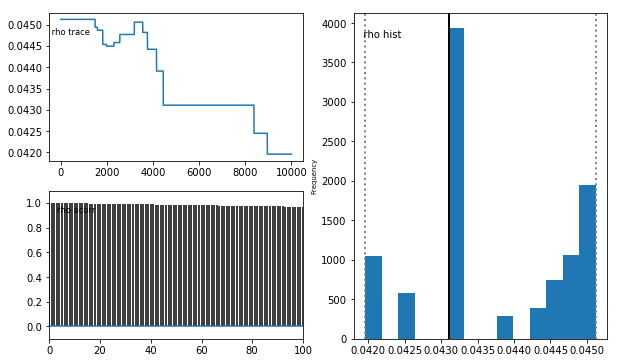

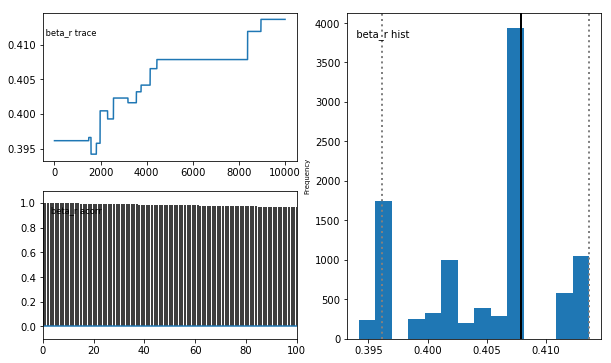

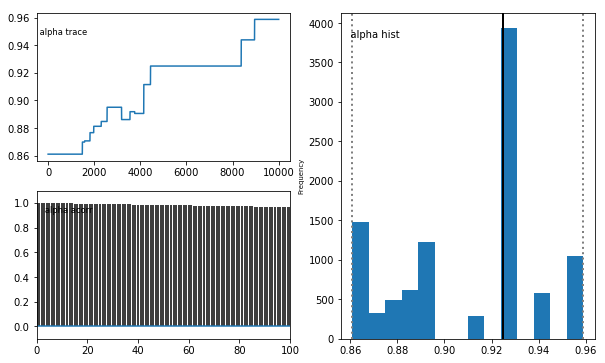

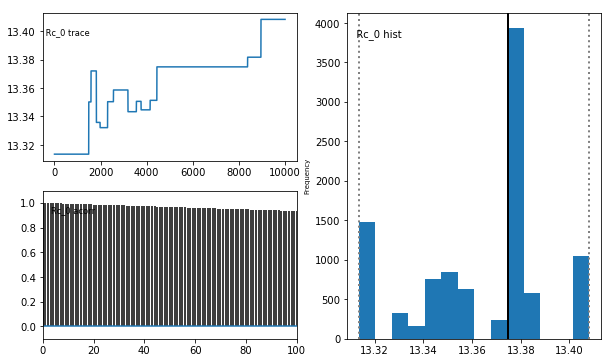

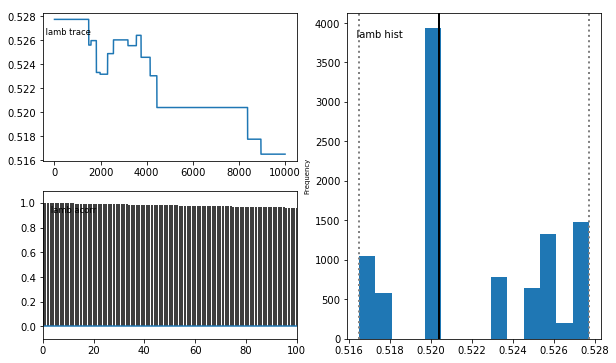

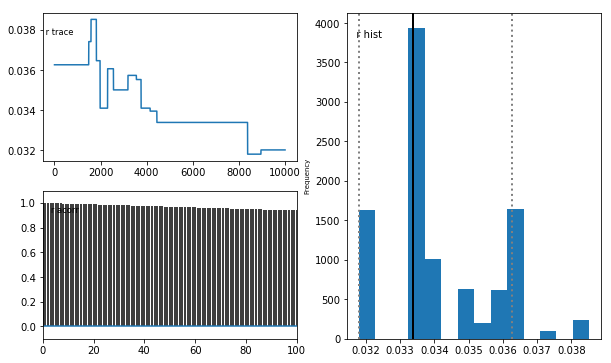

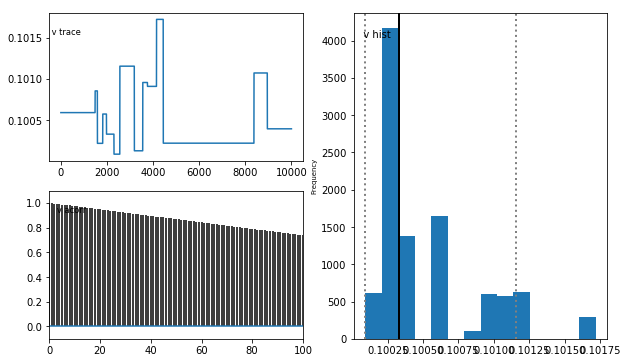

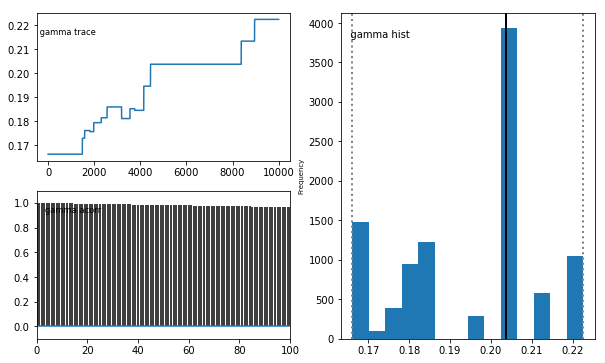

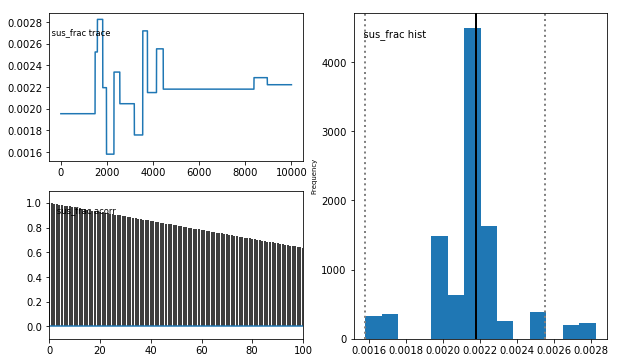

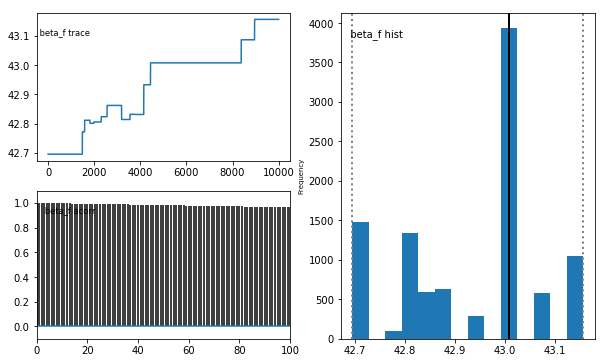

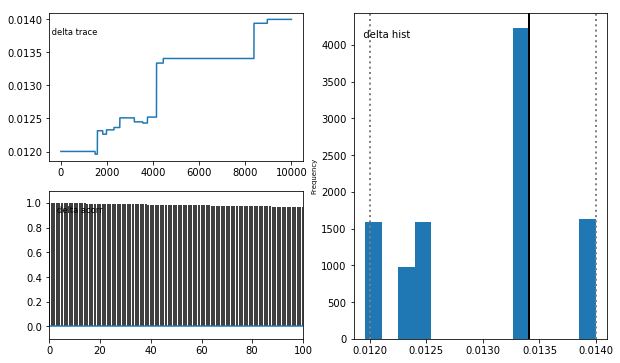

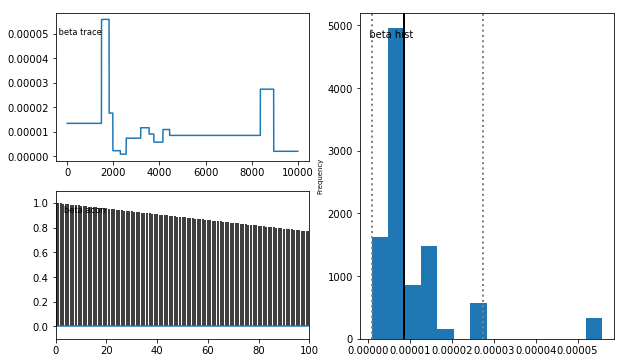

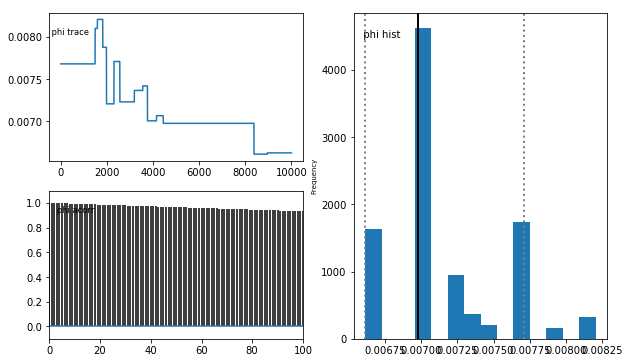

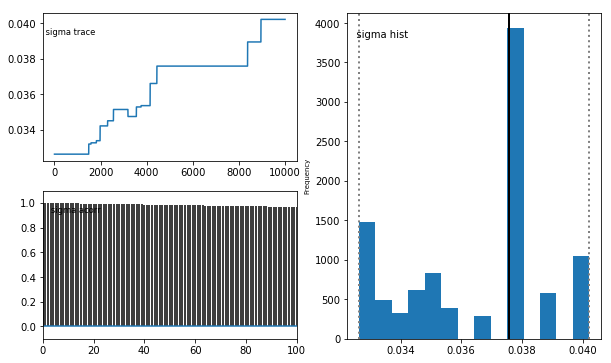

In [94]:
%matplotlib inline
plot(mc)

In [95]:
m_deaths = np.array(mortality_sim.stats()['mean'])
d_deaths = np.array(mortality_data)
# print m_deaths
# print d_deaths
# tmpD = (m_deaths - d_deaths)**2
# print tmpD
rmsq = np.sqrt(np.mean(( m_deaths - d_deaths)**2))
print rmsq

28.92626252587392


#### Plot the fit

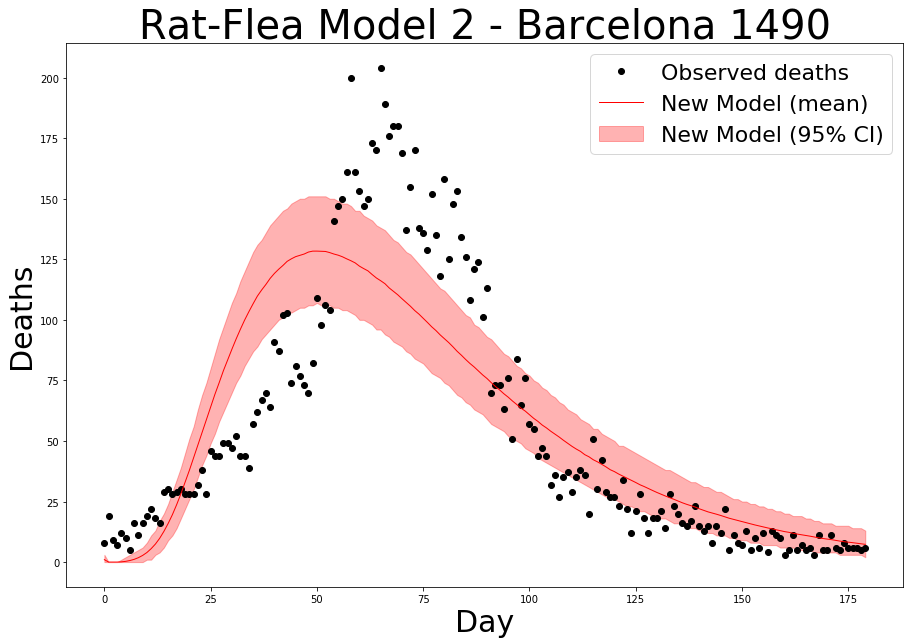

In [96]:
%matplotlib inline
plt.figure(figsize=(15,10))
plt.title('Rat-Flea Model 2 - Barcelona 1490', fontsize=40)
plt.xlabel('Day', fontsize=30)
plt.ylabel('Deaths', fontsize=30)
plt.plot(mortality_data, 'o', mec='black', color='black', label='Observed deaths')
plt.plot(mortality_sim.stats()['mean'], color='red', linewidth=1, label='New Model (mean)')
y_min = mortality_sim.stats()['quantiles'][2.5]
y_max = mortality_sim.stats()['quantiles'][97.5]
plt.fill_between(range(0,len(mortality_data)), y_min, y_max, color='r', alpha=0.3, label='New Model (95% CI)')
plt.legend(prop={"size":22})